## Load package with spaceranger v4 

In [9]:
library(Seurat)
library(sf)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [19]:
## load object
## I had to move the hires and lowres_image.png to segmented_output/spatial

data.dir="/Users/romansankowski/Documents/single_cell_analysis/F_Lohrmann_VisiumHD/data/WT2_spaceranger4/outs"
v3d <- Load10X_Spatial(data.dir = data.dir,
                            slice = "slice1",
                            bin.size = c("polygons"))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Saving 6.67 x 6.67 in image


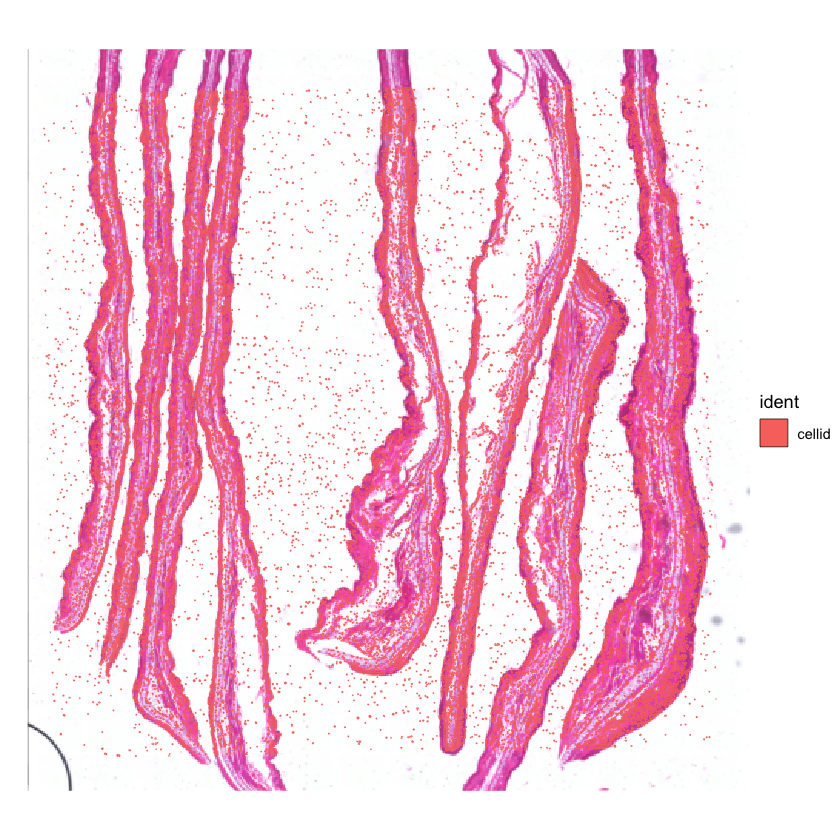

In [25]:
SpatialDimPlot(v3d, images = "slice1.polygons", plot_segmentations = TRUE)
ggsave(file.path("plots","spatial","segmented.pdf"))

In [14]:
## load metadata

meta=read.csv(file.path("results","adatas_obs.csv"), row.names="original_cell_id")

In [21]:
v3d = v3d |> AddMetaData(meta)

In [22]:
head(v3d[[]])


,orig.ident,nCount_Spatial.Polygons,nFeature_Spatial.Polygons,X,cell,centroid_x,centroid_y,centroid_z,component,volume,surface_area,scale,n_counts,cell_type,neighborhood_valid,novae_leaves,novae_domains_7,novae_sid
,<fct>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
cellid_000000003-1,cellid,144,132,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
cellid_000000004-1,cellid,2538,1591,35904,35904,2058.997,847.1182,0.5,9,228,114,1,3404,keratinocyte,True,D200,D1009,1.388198e+14
cellid_000000005-1,cellid,186,174,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
cellid_000000007-1,cellid,278,255,37145,37145,1819.432,778.7747,0.5,1,700,256,1,228,keratinocyte,True,D497,D1014,1.388198e+14
cellid_000000008-1,cellid,625,517,35710,35710,2098.014,863.0733,0.5,6,256,96,1,213,keratinocyte,True,D288,D1014,1.388198e+14
cellid_000000010-1,cellid,260,228,34403,34403,2319.977,756.0785,0.5,1,280,98,1,138,fibroblast,True,D470,D1015,1.388198e+14


In [24]:
saveRDS(v3d, file.path("results","segmented_seurat_with_image_and_celltype_novae_domain_assignment.rds"))